<h1>
Clasificador de raza de perros a partir del modelo preentrenado Inception versión 3

<hr>

# Importar Librerías

In [3]:
import PIL
import urllib.request as request
import matplotlib.pyplot as plt

# módulo de utilidades para trabajar la red neuronal
import torch
import torchvision.models as models
from torchvision import transforms


# Importar el modelo preentrenado:   Inception versión 3

In [4]:
inception = models.inception_v3(pretrained=True, num_classes=1000, aux_logits=False)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-1a9a5a14.pth


# Se obtiene una imágen de perro desde la web

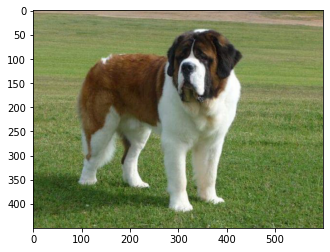

In [14]:
Dog_url = 'https://2.bp.blogspot.com/-_Iq-UGz8a_0/WmHbY9izarI/AAAAAAAAG64/oWL2WW_xU5cqeteODG1I48PCYfEFm6yqgCLcBGAs/s1600/San-Bernardo1-e1466581822154.jpg'
img = request.urlretrieve(Dog_url, '/content/san_bernardo.jpg')

# Mostrar la imágen
img = PIL.Image.open('/content/san_bernardo.jpg')
plt.imshow(img)

# Realizar el preprocesamiento de los datos

- Reducir el tamaño a 128*128*3
- Alinear la imagen en el centro
- convertirla en tensor y normalizar los datos con la media y desviación estándar

In [16]:
preprocess = transforms.Compose([
    
    transforms.Resize(128),
    transforms.CenterCrop(128),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])   ])


img_transformed = preprocess(img)

# Preparación de la imágen para ingresarla en la red

- el modelo espera una dimesión adicional vacía, entonces se le agrega
- se evalúa el modelo
- e ingresamos el batch al modelo

In [18]:
batch = torch.unsqueeze(img_transformed, 0)


inception.eval()

output = inception(batch)


# Labels del modelo Inception

- se obtienen los labels del modelo desde el repositorio

In [22]:
# En caso de que expire el link , se podrá descargar los labels desde:
# 'https://github.com/js-munozo/Clasificador_de_perros/blob/main/imagenet.txt'

request.urlretrieve('https://gist.githubusercontent.com/js-munozo/1f388156d21496aef36714e613ef613d/raw/da81fedf2248738f43df4d1d8f2838af0fe8e1a9/imagenet_labels.txt', 'labels.txt')
with open('labels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

# Encontrar un porcentaje de similitud que tiene la imagen con alguna clase del modelo Inception

In [23]:
_, index = torch.max(output, 1)

# buscar el porcentaje
percentage = torch.nn.functional.softmax(output, dim=1)[0] *100

# retornar la etiqueta y el mayor peso que se obtuvo para el batch
print( labels[index[0]], percentage[index[0]].item() )


Saint Bernard, St Bernard 100.0


# Ver las 5 principales predicciones de raza

In [24]:
_, indices = torch.sort(output, descending=True)
top_five = indices[0][:5]
for idx in top_five:
    print(labels[idx], percentage[idx].item())

Saint Bernard, St Bernard 100.0
Greater Swiss Mountain dog 1.1777885558386745e-14
basset, basset hound 2.3339600777981896e-17
boxer 6.356155502121277e-18
English foxhound 3.016556054003787e-18
